In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib notebook #makes notebook interactive

In [3]:
data = loadmat('ex5data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [5]:
X_train = np.c_[np.ones_like(data['X']), data['X']]
y_train = data['y']

yval = data['yval']
Xval = np.c_[np.ones_like(data['Xval']), data['Xval']]

<IPython.core.display.Javascript object>


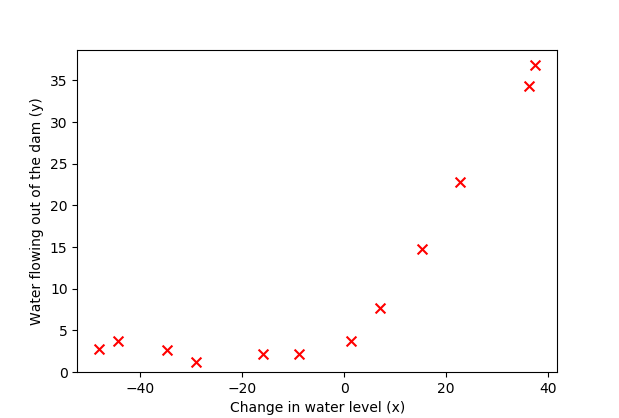

In [6]:
plt.scatter(X_train[:, 1], y_train, s=50, c='r', marker='x', linewidths=1)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.ylim(ymin=0);

In [7]:
def regularisedlrcostfunc(theta, X, y, reg):
    m = y.size
    h = X.dot(theta.reshape(-1, 1))
    J = (1/(2*m))*np.sum(np.square(h - y)) + (reg/(2*m)*np.sum(np.square(theta[1:])))
    return J

In [8]:
def regularisedlrgradient(theta, X, y, reg):
    h = X.dot(theta.reshape(-1, 1))
    m = y.size
    grad = ((1/m)*X.T.dot(h - y)) + (reg/m)*np.r_[[[0]], theta[1:].reshape(-1,1)]
    return grad.flatten()

In [9]:
initial_theta = np.ones((X_train.shape[1], 1))
cost = regularisedlrcostfunc(initial_theta, X_train, y_train, 0)
gradient = regularisedlrgradient(initial_theta, X_train, y_train, 0)
print(cost)
print(gradient)

303.9515255535976
[-15.30301567 598.16741084]
